In [190]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
# Loading the dataset from a CSV file
df = pd.read_csv("netflix.csv")

In [192]:
# Obtaining information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [193]:
# Checking the rows and columns in the dataset
df.shape

(8807, 12)

In [194]:
# Checking for missing values in the dataset
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [195]:
# Checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [196]:
# Replacing missing values in the 'director' column with 'No Data'
df['director'].replace(np.nan, 'No Data', inplace=True)

# Replacing missing values in the 'cast' column with 'No Data'
df['cast'].replace(np.nan, 'No Data', inplace=True)

In [197]:
# Filling missing values in the 'country' column with the mode value
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [198]:
df["duration"] = df['duration'].str.split(" ", expand=True)[0]

In [199]:
# Dropping rows with missing values
df.dropna(inplace=True)

In [200]:
# Splitting and expanding the 'cast' column
df_cast = df['cast'].str.split(',', expand=True).stack()
df_cast = df_cast.reset_index(level=1, drop=True).to_frame('cast')
df_cast['show_id'] = df['show_id']

# Splitting and expanding the 'country' column
df_country = df['country'].str.split(',', expand=True).stack()
df_country = df_country.reset_index(level=1, drop=True).to_frame('country')
df_country['show_id'] = df['show_id']

# Splitting and expanding the 'listed_in' column
df_listed_in = df['listed_in'].str.split(',', expand=True).stack()
df_listed_in = df_listed_in.reset_index(level=1, drop=True).to_frame('listed_in')
df_listed_in['show_id'] = df['show_id']

# Splitting and expanding the 'director' column
df_director = df['director'].str.split(',', expand=True).stack()
df_director = df_director.reset_index(level=1, drop=True).to_frame('director')
df_director['show_id'] = df['show_id']

In [201]:
# Converting the 'date_added' column to datetime format
df["date_added"] = pd.to_datetime(df['date_added'])


In [202]:
# Extracting month, month name, and year from the 'date_added' column
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [203]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8790 non-null   object        
 1   type              8790 non-null   object        
 2   title             8790 non-null   object        
 3   director          8790 non-null   object        
 4   cast              8790 non-null   object        
 5   country           8790 non-null   object        
 6   date_added        8790 non-null   datetime64[ns]
 7   release_year      8790 non-null   int64         
 8   rating            8790 non-null   object        
 9   duration          8790 non-null   object        
 10  listed_in         8790 non-null   object        
 11  description       8790 non-null   object        
 12  month_added       8790 non-null   int64         
 13  month_name_added  8790 non-null   object        
 14  year_added        8790 n

In [205]:
df1 = df_cast.merge(df_country, on="show_id", how='inner')

In [206]:
df2 = df_listed_in.merge(df_director, on="show_id", how='inner')

In [207]:
df_merge = df1.merge(df2, on="show_id", how='inner')
df_merge.head()

,cast,show_id,country,listed_in,director
0,No Data,s1,United States,Documentaries,Kirsten Johnson
1,Ama Qamata,s2,South Africa,International TV Shows,No Data
2,Ama Qamata,s2,South Africa,TV Dramas,No Data
3,Ama Qamata,s2,South Africa,TV Mysteries,No Data
4,Khosi Ngema,s2,South Africa,International TV Shows,No Data


In [208]:
df.drop(['cast', 'director', 'country', 'listed_in', 'description'], axis=1, inplace=True)

In [209]:
data = df_merge.merge(df, on="show_id", how='inner')
data.head()

,cast,show_id,country,listed_in,director,type,title,date_added,release_year,rating,duration,month_added,month_name_added,year_added
0,No Data,s1,United States,Documentaries,Kirsten Johnson,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,9,September,2021
1,Ama Qamata,s2,South Africa,International TV Shows,No Data,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,9,September,2021
2,Ama Qamata,s2,South Africa,TV Dramas,No Data,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,9,September,2021
3,Ama Qamata,s2,South Africa,TV Mysteries,No Data,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,9,September,2021
4,Khosi Ngema,s2,South Africa,International TV Shows,No Data,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,9,September,2021


In [210]:
data.shape

(201837, 14)

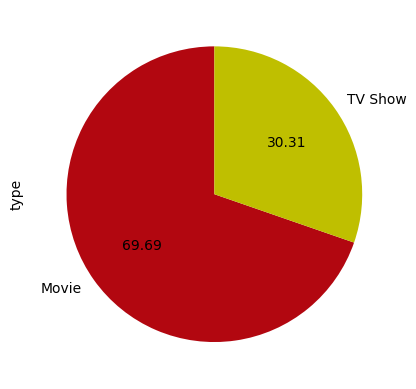

In [211]:
df['type'].value_counts().plot(kind='pie',autopct="%.2f", colors = ['#b20710', 'y'], startangle=90)
plt.show()

## **The pie chart visualization shows that approximately 70% of the content on Netflix consists of movies, while the remaining 30% are TV shows.**

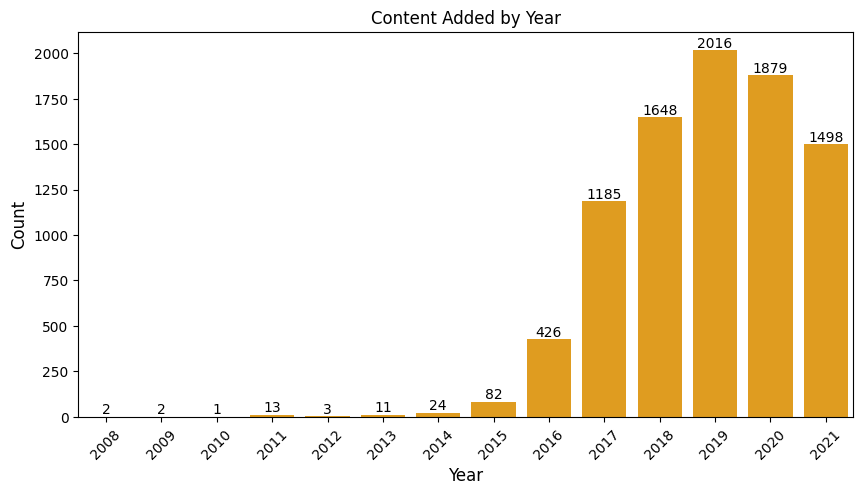

In [212]:
plt.figure(figsize = (10,5))
plot = sns.countplot(x=('year_added'), data=df, color='orange')
plt.xticks(rotation = 45)
plot.bar_label(plot.containers[0])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Content Added by Year')
plt.show()

## **The bar chart visualization reveals that in 2019, movies and tv shows are added to the library most.**

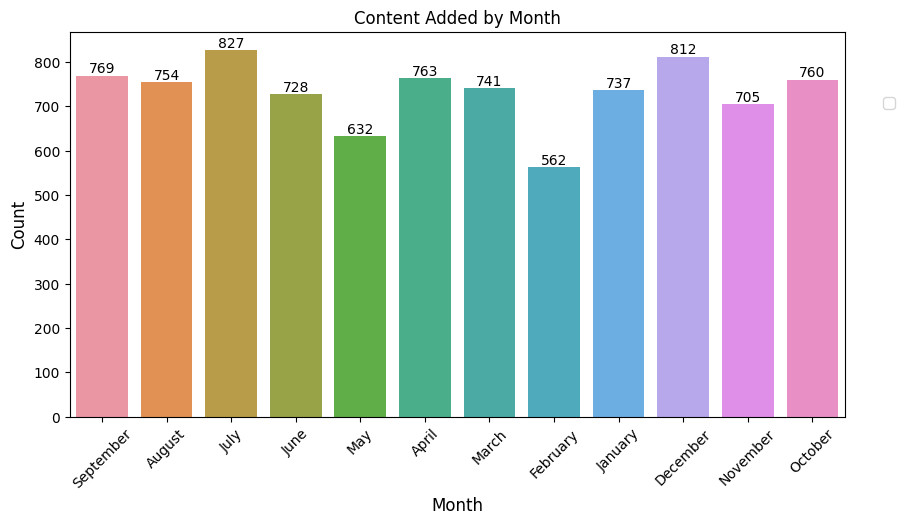

In [213]:
plt.figure(figsize = (10,5))
plot = sns.countplot(x='month_name_added', data=df)
plt.xticks(rotation = 45)
plt.legend(loc = (1.05, 0.8))
for container in plot.containers:
    plot.bar_label(container)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Content Added by Month')
plt.show()

## **The bar chart shows that July and December are the months when Netflix adds the most content to its library. This information can be valuable for viewers who want to anticipate new releases during these months.**

In [214]:
movie = df.loc[df["type"] == "Movie"]

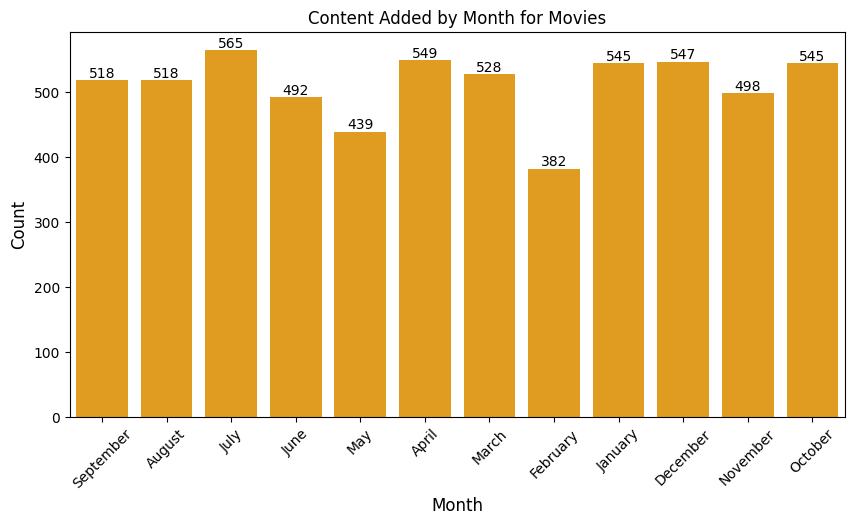

In [215]:
plt.figure(figsize = (10,5))
plot = sns.countplot(x=('month_name_added'), data=movie, color='orange')
plt.xticks(rotation = 45)
plot.bar_label(plot.containers[0])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Content Added by Month for Movies')
plt.show()

In [216]:
tv = df.loc[df["type"] == "TV Show"]

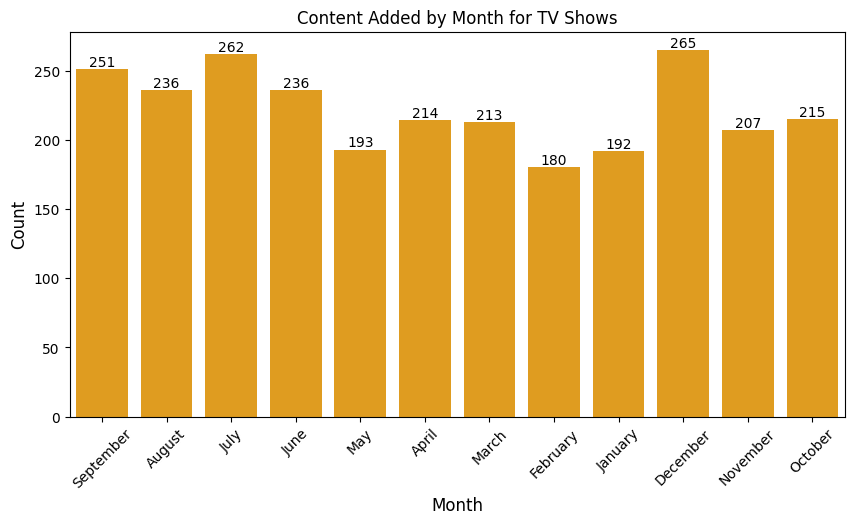

In [217]:
plt.figure(figsize = (10,5))
plot = sns.countplot(x=('month_name_added'), data=tv, color='orange')
plt.xticks(rotation = 45)
plot.bar_label(plot.containers[0])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Content Added by Month for TV Shows')
plt.show()

# **According to the above analysis, It revealed that Netflix had added more movies than TV shows, aligning with the expectation that movies dominate their content library.**

In [218]:
country_counts = df_country['country'].value_counts()

In [219]:
top_10_countries = country_counts.head(10)

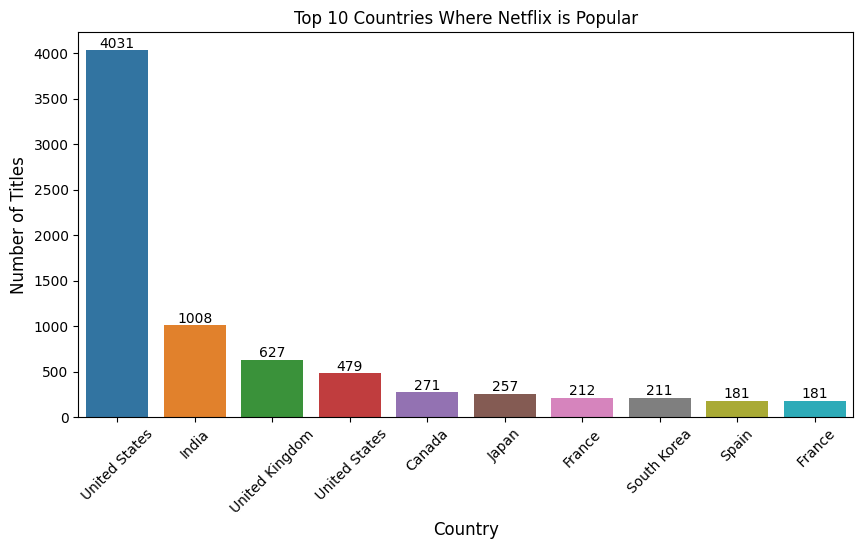

In [220]:
plt.figure(figsize = (10,5))
plot = sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
plt.xticks(rotation = 45)
plot.bar_label(plot.containers[0])
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.title('Top 10 Countries Where Netflix is Popular')
plt.show()

## **The bar chart visualization reveals that the United States is the top country where Netflix is popular.**

In [221]:
cast_counts = df_cast['cast'].value_counts()[1:]

In [222]:
top_10_cast = cast_counts.head(10)

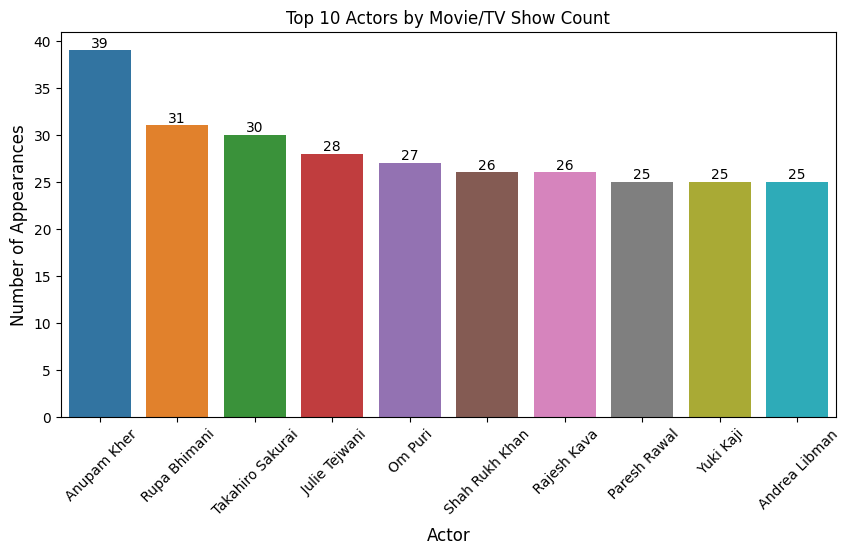

In [223]:
 plt.figure(figsize = (10,5))
 plot = sns.barplot(x=top_10_cast.index, y=top_10_cast.values)
 plt.xticks(rotation = 45)
 plot.bar_label(plot.containers[0])
 plt.xlabel('Actor', fontsize=12)
 plt.ylabel('Number of Appearances', fontsize=12)
 plt.title('Top 10 Actors by Movie/TV Show Count')
 plt.show()

## **The bar chart shows that Anupam Kher has the highest appearances in movies and TV shows.**

In [224]:
director_counts = df_director['director'].value_counts()[1:]

In [225]:
top_10_directors = director_counts.head(10)

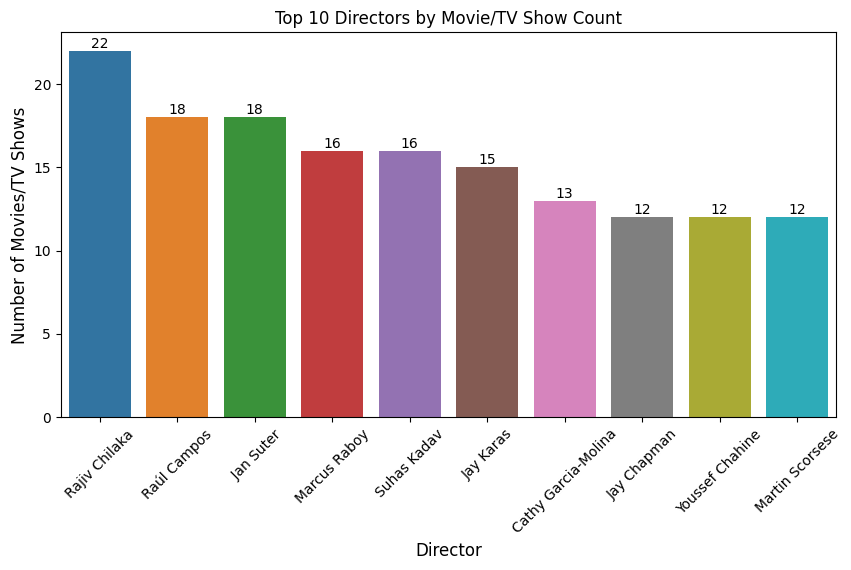

In [226]:
plt.figure(figsize = (10,5))
plot = sns.barplot(x=top_10_directors.index, y=top_10_directors.values)
plt.xticks(rotation = 45)
plot.bar_label(plot.containers[0])
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of Movies/TV Shows', fontsize=12)
plt.title('Top 10 Directors by Movie/TV Show Count')
plt.show()

## **The bar chart displays the top 10 directors with the most movies or TV shows. Rajiv Chilaka seems to have directed the most content in the Netflix library.**

In [227]:
df_listed_in['listed_in'] = df_listed_in['listed_in'].str.strip()
listed_in_counts = df_listed_in['listed_in'].value_counts()

In [228]:
top_10_listed_in = listed_in_counts.head(10)

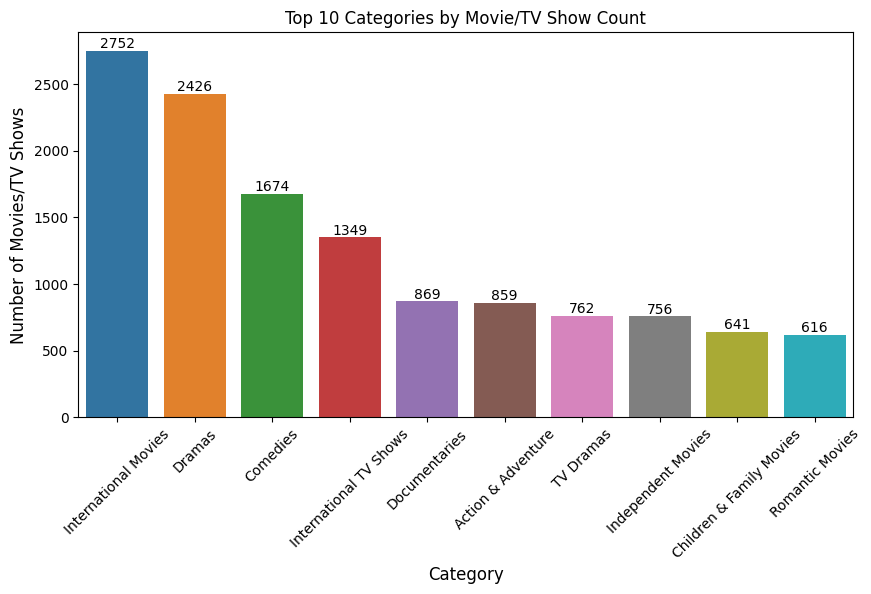

In [229]:
plt.figure(figsize = (10,5))
plot = sns.barplot(x=top_10_listed_in.index, y=top_10_listed_in.values)
plt.xticks(rotation = 45)
plot.bar_label(plot.containers[0])
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Movies/TV Shows', fontsize=12)
plt.title('Top 10 Categories by Movie/TV Show Count')
plt.show()

## **The bar chart shows the top 10 categories of movies and TV shows based on their count. “International Movies” is the most dominant category, followed by “Dramas.”**

In [230]:
rating_counts = df['rating'].value_counts()

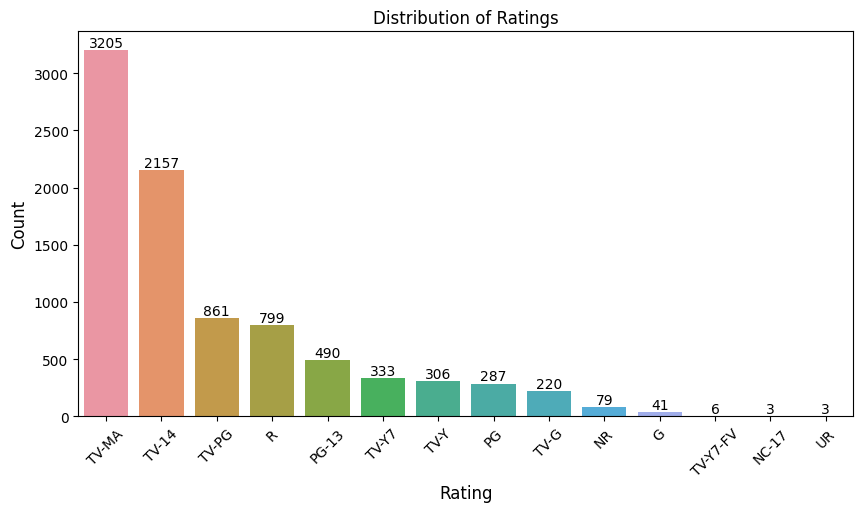

In [231]:
plt.figure(figsize = (10,5))
plot = sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xticks(rotation = 45)
plot.bar_label(plot.containers[0])
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Ratings')
plt.show()

## **Analyzing the bar chart, we can observe the distribution of ratings on Netflix. It helps us identify the most common rating categories and their relative frequency.**

In [232]:
movie['duration'] = movie['duration'].str.extract('(\d+)', expand=False).astype(int)

<ipython-input-232-6df19b385c24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration'] = movie['duration'].str.extract('(\d+)', expand=False).astype(int)


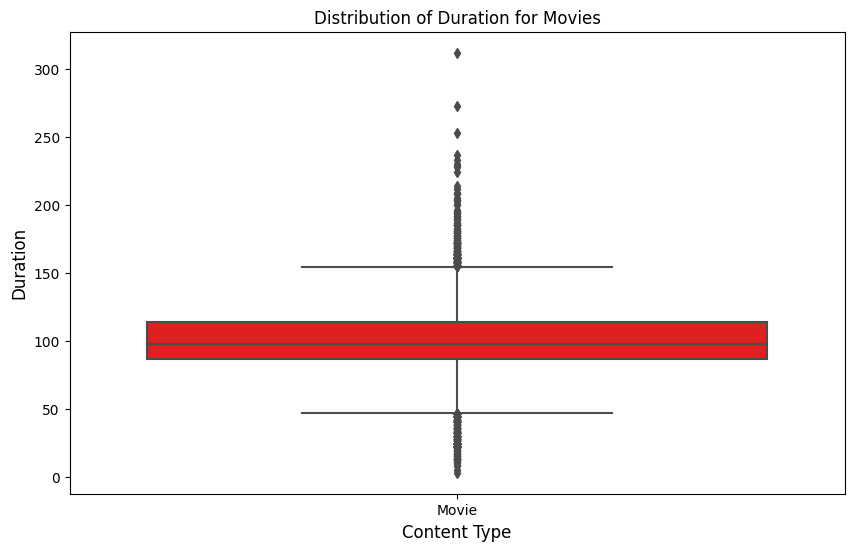

In [233]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = movie, x='type', y='duration', color="r")
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.title('Distribution of Duration for Movies')
plt.show()

# **Analyzing the movie box plot, we can see that most movies fall within a reasonable duration range, with few outliers exceeding approximately 2.5 hours. This suggests that most movies on Netflix are designed to fit within a standard viewing time.**

In [234]:
tv['duration'] = tv['duration'].str.extract('(\d+)', expand=False).astype(int)

<ipython-input-234-07eb9baf3086>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv['duration'] = tv['duration'].str.extract('(\d+)', expand=False).astype(int)


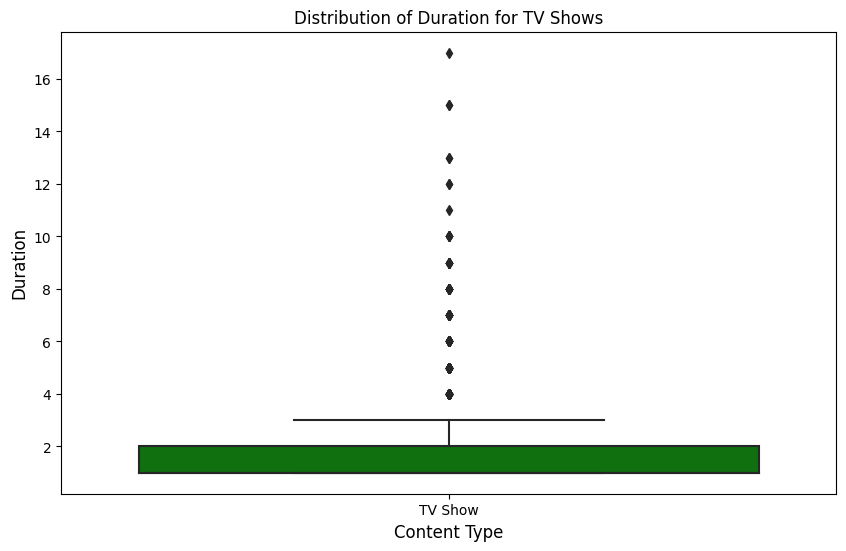

In [235]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=tv, x='type', y='duration', color="g")
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.title('Distribution of Duration for TV Shows')
plt.show()

## **For TV shows, the box plot reveals that most shows have one to two seasons, with very few outliers having longer durations. This aligns with the earlier trends, indicating that Netflix focuses on shorter series formats.**

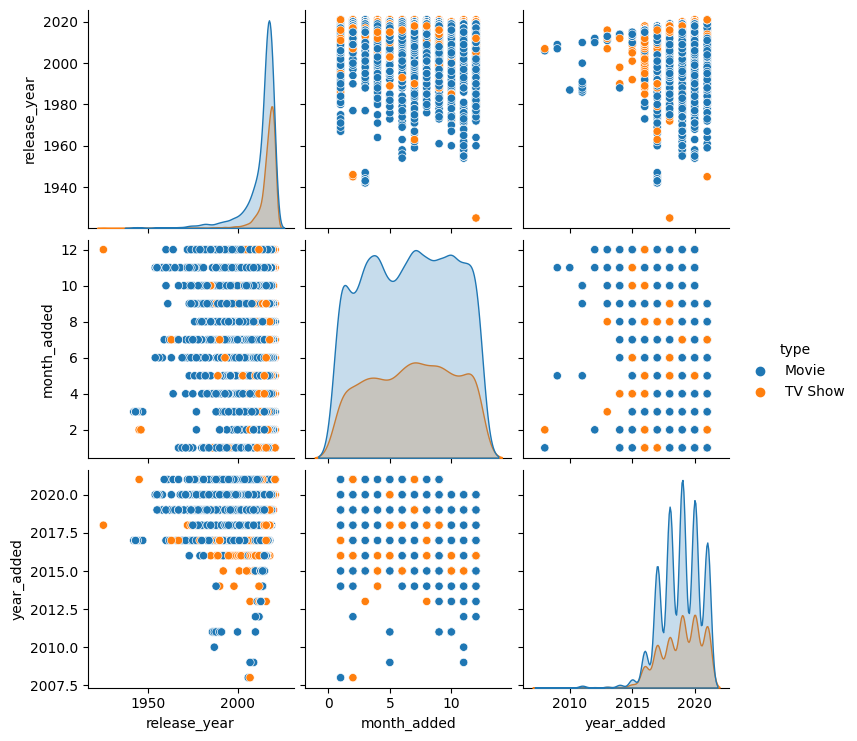

In [236]:
sns.pairplot(data = df, hue = "type")
# plt.title('Pair-Plots')
plt.show()